### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import investpy

### Importing stock data using Investpy

In [82]:
stock_name = "RELI" # Name of the stock

df = investpy.get_stock_historical_data(stock = stock_name,
                                        country = 'India',
                                        from_date = '01/01/2010',
                                        to_date = '31/12/2020')

### Plot of the stock price data of Reliance Industries Limited stock for 11 years (2010-2020)

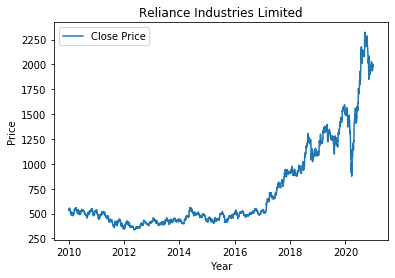

In [83]:
plt.plot(df[['Close']], label = "Close Price")
plt.legend()
plt.title('Reliance Industries Limited')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

In [9]:
df = df.reset_index()

In [10]:
df1 = df['Close']

### Scaling the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

### Train Test Split

In [12]:
index_2020 = df[df["Date"] == "2020-01-01"].index.astype(int)[0] # index of start of year 2020
train_data, test_data = df1[0:index_2020, :], df1[index_2020:,:]

### Creating dataset for model using time step

In [13]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1): # -1 can should be removed to get the complete dataset
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
# reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Creating and fitting LSTM Model

In [17]:
#Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
38/38 [==============================] - 18s 310ms/step - loss: 0.0084 - val_loss: 0.0073
Epoch 2/100
38/38 [==============================] - 8s 205ms/step - loss: 3.6043e-04 - val_loss: 0.0035
Epoch 3/100
38/38 [==============================] - 8s 214ms/step - loss: 3.1603e-04 - val_loss: 0.0049
Epoch 4/100
38/38 [==============================] - 9s 233ms/step - loss: 2.5589e-04 - val_loss: 0.0029
Epoch 5/100
38/38 [==============================] - 7s 186ms/step - loss: 2.5291e-04 - val_loss: 0.0043
Epoch 6/100
38/38 [==============================] - 7s 182ms/step - loss: 2.6387e-04 - val_loss: 0.0061
Epoch 7/100
38/38 [==============================] - 8s 207ms/step - loss: 2.4644e-04 - val_loss: 0.0068
Epoch 8/100
38/38 [==============================] - 8s 195ms/step - loss: 2.6822e-04 - val_loss: 0.0021
Epoch 9/100
38/38 [==============================] - 8s 207ms/step - loss: 2.5467e-04 - val_loss: 0.0046
Epoch 10/100
38/38 [==============================] - 7s 1

Epoch 78/100
38/38 [==============================] - 6s 162ms/step - loss: 5.5001e-05 - val_loss: 5.5994e-04
Epoch 79/100
38/38 [==============================] - 6s 160ms/step - loss: 5.3751e-05 - val_loss: 4.1086e-04
Epoch 80/100
38/38 [==============================] - 7s 184ms/step - loss: 5.5081e-05 - val_loss: 8.5158e-04
Epoch 81/100
38/38 [==============================] - 9s 228ms/step - loss: 4.8522e-05 - val_loss: 0.0016
Epoch 82/100
38/38 [==============================] - 7s 191ms/step - loss: 7.5832e-05 - val_loss: 8.3790e-04
Epoch 83/100
38/38 [==============================] - 7s 174ms/step - loss: 4.7375e-05 - val_loss: 0.0013
Epoch 84/100
38/38 [==============================] - 7s 185ms/step - loss: 4.8748e-05 - val_loss: 0.0025
Epoch 85/100
38/38 [==============================] - 7s 181ms/step - loss: 5.3970e-05 - val_loss: 4.2684e-04
Epoch 86/100
38/38 [==============================] - 7s 173ms/step - loss: 4.5818e-05 - val_loss: 4.5321e-04
Epoch 87/100
38/38 [==

### Predict values

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### Inverse Transform predicted values

In [33]:
# transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate Mean Squared Error

In [34]:
# RMSE performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict)

687.5872346304893

In [35]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1936.0083347670052

### Plot graph of predicted stock price and actual stock price

In [64]:
close_values = np.array(df["Close"]).reshape(-1, 1)

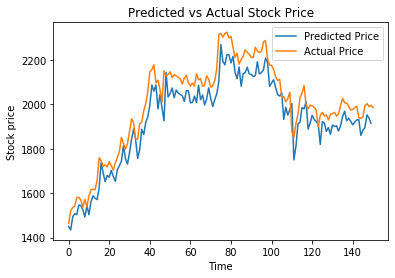

In [72]:
plt.plot(test_predict, label="Predicted Price")
plt.plot(close_values[-len(test_predict)-1:], label="Actual Price")
plt.legend()
plt.title('Predicted vs Actual Stock Price')
plt.ylabel('Stock price')
plt.xlabel('Time')
plt.show()